### Fashion MNIST
- Functional API
- Transform the pixel value from 1 ~ 255 to 0 ~ 1 as float32
- Apply One Hot Encoding on Label (categorical crossentropy)
- Divide Train/Validation/Test
- Compile, fit, evaluate

### Building Model using Functional API

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model

INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    
    return model

Init Plugin
Init Graph Optimizer
Init Kernel


### Dividing Dataset & Preprocessing

In [2]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def get_preprocessed_data(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

def get_preprocessed_ohe(images, labels):
    
    images, labels = get_preprocessed_data(images, labels)
    
    oh_labels = to_categorical(labels)
    
    return images, oh_labels

def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

### Load Fashion MNIST Dataset

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('train images shape: ', train_images.shape)
print('train labels shape: ', train_labels.shape)
print('test images shape: ', test_images.shape)
print('test labels shape: ', test_labels.shape)

print()

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print('train images shape: ', tr_images.shape)
print('train ohe labels shape: ', tr_oh_labels.shape)
print('validatioin images shape: ', val_images.shape)
print('validation ohe labels shape: ', val_oh_labels.shape)
print('test images shape: ', test_images.shape)
print('test ohe labels shape: ', test_oh_labels.shape)

train images shape:  (60000, 28, 28)
train labels shape:  (60000,)
test images shape:  (10000, 28, 28)
test labels shape:  (10000,)

train images shape:  (51000, 28, 28)
train ohe labels shape:  (51000, 10)
validatioin images shape:  (9000, 28, 28)
validation ohe labels shape:  (9000, 10)
test images shape:  (10000, 28, 28)
test ohe labels shape:  (10000, 10)


### Compile, Fit, Evaluate

In [4]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.summary()

Metal device set to: Apple M1
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


2021-08-13 14:34:29.726517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-08-13 14:34:29.726853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))

2021-08-13 14:34:33.541725: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-13 14:34:33.544421: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-08-13 14:34:33.671864: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/20
392/399 [============================>.] - ETA: 0s - loss: 0.6084 - accuracy: 0.7953

2021-08-13 14:34:36.283103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.6058 - accuracy: 0.7960 - val_loss: 0.4758 - val_accuracy: 0.8351
Epoch 2/20
399/399 [==============================] - 2s 6ms/step - loss: 0.4116 - accuracy: 0.8564 - val_loss: 0.4024 - val_accuracy: 0.8558
Epoch 3/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3743 - accuracy: 0.8675 - val_loss: 0.3953 - val_accuracy: 0.8572
Epoch 4/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3459 - accuracy: 0.8770 - val_loss: 0.3842 - val_accuracy: 0.8614
Epoch 5/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3313 - accuracy: 0.8811 - val_loss: 0.3677 - val_accuracy: 0.8656
Epoch 6/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3119 - accuracy: 0.8875 - val_loss: 0.3471 - val_accuracy: 0.8770
Epoch 7/20
399/399 [==============================] - 2s 6ms/step - loss: 0.3012 - accuracy: 0.8910 - val_loss: 0.3391 - val_accuracy: 0.8738
Epoch 8/20
399/39

### Plotting

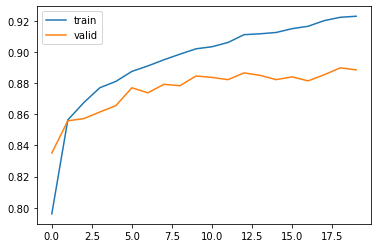

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()

show_history(history)

### Callback

In [8]:
!pwd

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST


In [9]:
import os

current_path = os.getcwd()
callback_path = os.path.join(current_path, 'callbacks')

### ModelCheckpoint

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()

model.compile(
    optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy']
)

mcp_cb = ModelCheckpoint(filepath=callback_path + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', 
                        monitor='val_loss',
                         save_best_only=True,
                         save_weights_only=True,
                         mode='min',
                         period=3,
                         verbose=1
                        )

history = model.fit(
    x=tr_images,
    y=tr_oh_labels,
    batch_size=128,
    epochs=10,
    validation_data=(val_images, val_oh_labels),
    callbacks=[mcp_cb]
)

Epoch 1/10
 18/399 [>.............................] - ETA: 2s - loss: 1.6893 - accuracy: 0.4579

2021-08-13 14:35:49.243258: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


395/399 [============================>.] - ETA: 0s - loss: 0.6101 - accuracy: 0.7908

2021-08-13 14:35:51.543052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.6092 - accuracy: 0.7911 - val_loss: 0.4579 - val_accuracy: 0.8372
Epoch 2/10
399/399 [==============================] - 2s 6ms/step - loss: 0.4186 - accuracy: 0.8523 - val_loss: 0.4234 - val_accuracy: 0.8450
Epoch 3/10
399/399 [==============================] - 2s 6ms/step - loss: 0.3780 - accuracy: 0.8659 - val_loss: 0.3941 - val_accuracy: 0.8590

Epoch 00003: val_loss improved from inf to 0.39408, saving model to /Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks/weights.03-0.39.hdf5
Epoch 4/10
399/399 [==============================] - 2s 6ms/step - loss: 0.3500 - accuracy: 0.8748 - val_loss: 0.3852 - val_accuracy: 0.8593
Epoch 5/10
399/399 [==============================] - 2s 6ms/step - loss: 0.3350 - accuracy: 0.8783 - val_loss: 0.3501 - val_accuracy: 0.8762
Epoch 6/10
399/399 [==============================] - 2s 6ms/step - loss: 0.3151 - accuracy: 0.8862 - val_loss: 0.3385 - val_accuracy: 0.8

In [11]:
%cd /Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks


In [12]:
!pwd

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks


In [13]:
!ls -lia

total 2016
5527260 drwxr-xr-x  5 jamm  staff     160  8 13 14:36 .
5318448 drwxr-xr-x  9 jamm  staff     288  8 13 14:35 ..
5636821 -rw-r--r--  1 jamm  staff  343264  8 13 14:35 weights.03-0.39.hdf5
5636850 -rw-r--r--  1 jamm  staff  343264  8 13 14:36 weights.06-0.34.hdf5
5636879 -rw-r--r--  1 jamm  staff  343264  8 13 14:36 weights.09-0.34.hdf5


In [14]:
!rm -rf weight*

In [15]:
!ls -lia

total 0
5527260 drwxr-xr-x  2 jamm  staff   64  8 13 14:37 .
5318448 drwxr-xr-x  9 jamm  staff  288  8 13 14:35 ..


In [16]:
%cd ..

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST


In [17]:
!pwd

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST


### ReduceLROnPlateau

In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=3,
    mode='min',
    verbose=1
)

history = model.fit(
    x=tr_images,
    y=tr_oh_labels,
    batch_size=128,
    epochs=30,
    validation_data=(val_images, val_oh_labels),
    callbacks=[rlr_cb]
)

Epoch 1/30
 18/399 [>.............................] - ETA: 2s - loss: 1.8004 - accuracy: 0.3646

2021-08-13 14:41:42.364434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


397/399 [============================>.] - ETA: 0s - loss: 0.6084 - accuracy: 0.7910

2021-08-13 14:41:44.659944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.6079 - accuracy: 0.7911 - val_loss: 0.4855 - val_accuracy: 0.8262
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.4181 - accuracy: 0.8545 - val_loss: 0.4086 - val_accuracy: 0.8569
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3742 - accuracy: 0.8675 - val_loss: 0.3876 - val_accuracy: 0.8624
Epoch 4/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3449 - accuracy: 0.8761 - val_loss: 0.3560 - val_accuracy: 0.8722
Epoch 5/30
399/399 [==============================] - 3s 6ms/step - loss: 0.3233 - accuracy: 0.8834 - val_loss: 0.3654 - val_accuracy: 0.8682
Epoch 6/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3105 - accuracy: 0.8883 - val_loss: 0.3415 - val_accuracy: 0.8798
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3007 - accuracy: 0.8900 - val_loss: 0.3260 - val_accuracy: 0.8827
Epoch 8/30
399/39

### EarlyStopping

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=3,
    mode='min',
    verbose=1
)

history = model.fit(
    x=tr_images,
    y=tr_oh_labels,
    batch_size=128,
    epochs=30,
    validation_data=(val_images, val_oh_labels),
    callbacks=[ely_cb]
)

Epoch 1/30
 18/399 [>.............................] - ETA: 2s - loss: 1.6156 - accuracy: 0.4531

2021-08-13 14:48:12.922029: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


395/399 [============================>.] - ETA: 0s - loss: 0.5911 - accuracy: 0.7973

2021-08-13 14:48:15.218097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.5898 - accuracy: 0.7976 - val_loss: 0.4563 - val_accuracy: 0.8406
Epoch 2/30
399/399 [==============================] - 2s 6ms/step - loss: 0.4125 - accuracy: 0.8541 - val_loss: 0.4201 - val_accuracy: 0.8502
Epoch 3/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3754 - accuracy: 0.8657 - val_loss: 0.3778 - val_accuracy: 0.8610
Epoch 4/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3506 - accuracy: 0.8730 - val_loss: 0.3603 - val_accuracy: 0.8679
Epoch 5/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3358 - accuracy: 0.8795 - val_loss: 0.3577 - val_accuracy: 0.8661
Epoch 6/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3201 - accuracy: 0.8838 - val_loss: 0.3417 - val_accuracy: 0.8748
Epoch 7/30
399/399 [==============================] - 2s 6ms/step - loss: 0.3052 - accuracy: 0.8883 - val_loss: 0.3382 - val_accuracy: 0.8770
Epoch 8/30
399/39

### Callbacks Summary

In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(
    filepath=callback_path + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    period=1,
    verbose=0
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=5,
    mode='min',
    verbose=1
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=7,
    mode='min',
    verbose=1
)

history = model.fit(
    x=tr_images,
    y=tr_oh_labels,
    batch_size=128,
    epochs=40,
    validation_data=(val_images, val_oh_labels),
    callbacks=[mcp_cb, rlr_cb, ely_cb]
)

Epoch 1/40
 19/399 [>.............................] - ETA: 2s - loss: 1.6796 - accuracy: 0.4630

2021-08-13 15:00:02.365632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


395/399 [============================>.] - ETA: 0s - loss: 0.6109 - accuracy: 0.7910

2021-08-13 15:00:04.654883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


399/399 [==============================] - 3s 6ms/step - loss: 0.6092 - accuracy: 0.7916 - val_loss: 0.5187 - val_accuracy: 0.8107
Epoch 2/40
399/399 [==============================] - 2s 6ms/step - loss: 0.4240 - accuracy: 0.8517 - val_loss: 0.4382 - val_accuracy: 0.8404
Epoch 3/40
399/399 [==============================] - 2s 6ms/step - loss: 0.3842 - accuracy: 0.8629 - val_loss: 0.3783 - val_accuracy: 0.8658
Epoch 4/40
399/399 [==============================] - 3s 6ms/step - loss: 0.3550 - accuracy: 0.8727 - val_loss: 0.3759 - val_accuracy: 0.8658
Epoch 5/40
399/399 [==============================] - 2s 6ms/step - loss: 0.3324 - accuracy: 0.8805 - val_loss: 0.3463 - val_accuracy: 0.8783
Epoch 6/40
399/399 [==============================] - 2s 6ms/step - loss: 0.3186 - accuracy: 0.8837 - val_loss: 0.3574 - val_accuracy: 0.8676
Epoch 7/40
399/399 [==============================] - 2s 6ms/step - loss: 0.3033 - accuracy: 0.8903 - val_loss: 0.3644 - val_accuracy: 0.8693
Epoch 8/40
399/39

In [27]:
!pwd

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST


In [29]:
%cd /Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks


In [30]:
!pwd

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST/callbacks


In [31]:
!ls -lia

total 6048
5527260 drwxr-xr-x  11 jamm  staff     352  8 13 15:00 .
5318448 drwxr-xr-x   9 jamm  staff     288  8 13 15:01 ..
5641663 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.01-0.52.hdf5
5641665 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.02-0.44.hdf5
5641675 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.03-0.38.hdf5
5641696 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.04-0.38.hdf5
5641701 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.05-0.35.hdf5
5641729 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.08-0.32.hdf5
5641766 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.13-0.31.hdf5
5641796 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.17-0.31.hdf5
5641800 -rw-r--r--   1 jamm  staff  343440  8 13 15:00 weights.19-0.31.hdf5


In [32]:
!rm weight*

In [33]:
!ls -lia

total 0
5527260 drwxr-xr-x  2 jamm  staff   64  8 13 15:02 .
5318448 drwxr-xr-x  9 jamm  staff  288  8 13 15:01 ..


In [34]:
%cd ..

/Users/jamm/Documents/Github/AI/DeepLearning_CNN/Fashion_MNIST
